<a href="https://colab.research.google.com/github/NhatHuy2k2/AI/blob/main/Week11_CNN_fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [28]:
(train_X, train_Y), (test_X, test_Y)= fashion_mnist.load_data()
print(train_X.shape)
print(train_Y.shape)

(60000, 28, 28)
(60000,)


Text(0.5, 1.0, 'Số: 8')

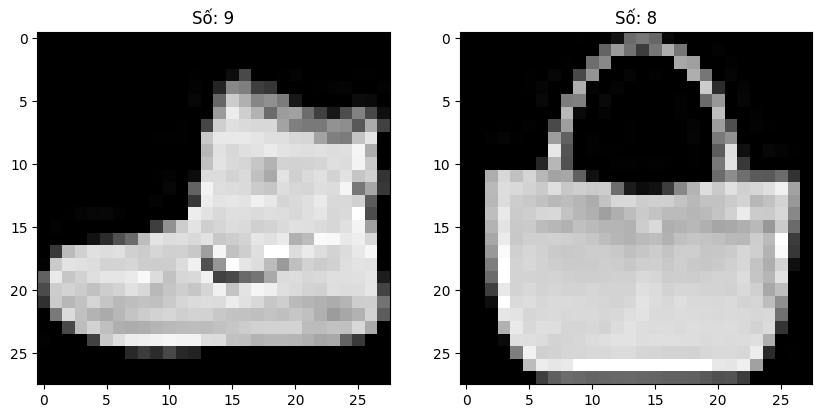

In [29]:
plt.figure(figsize = [10, 10])
plt.subplot(1,2,1)
plt.imshow(train_X[0,:,:], cmap = 'gray')
plt.title("Số: {}".format(train_Y[0]))
plt.subplot(1,2,2)
plt.imshow(train_X[100,:,:], cmap = 'gray')
plt.title("Số: {}".format(train_Y[100]))


In [30]:
train_X = train_X.reshape(60000, 28, 28, 1)
test_X = test_X.reshape(10000, 28, 28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [31]:
train_X = train_X.astype('float32')/255
test_X = test_X.astype('float32')/255

In [32]:
from keras.utils import to_categorical
train_Y_categorized = to_categorical(train_Y)
test_Y_categorized = to_categorical(test_Y)


In [33]:
from keras.models import Sequential, model_from_config
from keras import Input
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
# Normalization: chuẩn hóa dữ liệu
from keras.optimizers import Adam
batch_size = 64 # Lô học 
epochs = 2 # Số lần học
classes = 10 # Phân loại


CNN (Convolution Neural Network): dùng để trích xuất đặc tính của tập dữ liệu qua việc nhân tích chập ma trận với các kernel

In [34]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))
#Conv2d(): tham số đầu: số lần nhân tích chập; tham số thứ 2: kích thước kernel
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


ANN (Artificial Neural Network): dùng để phân loại dữ liệu ảnh

In [35]:
model.add(Flatten()) # Flatten: hàm ép kiểu ma trận thành vector
model.add(Dense(128,activation = "linear"))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = "softmax"))

In [36]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
model.summary()
train = model.fit(train_X, train_Y_categorized, batch_size = batch_size, epochs = epochs, verbose = 1)
# verbose: hiển thị kết quả

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [37]:
model.save('/content/drive/MyDrive/Trained model/Week11_CNN_fasionMNIST.h5')